## Delta Hedging with Convertible bonds
This notebook demonstrates how to get pricing data for a convertible bond and the underlying stock. It implements static and dynamic delta hedging and visualises the strategy outcomes.

#### Learn more

To learn more about the Data Library for Python please join the LSEG Developer Community. By [registering](https://developers.lseg.com/iam/register) and [logging](https://developers.lseg.com/content/devportal/en_us/initCookie.html) into the LSEG Developer Community portal you will have free access to a number of learning materials like 
 [Quick Start guides](https://developers.lseg.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python/quick-start), 
 [Tutorials](https://developers.lseg.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python/tutorials), 
 [Documentation](https://developers.lseg.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python/documentation)
 and much more.

#### Getting Help and Support

If you have any questions regarding using the API, please post them on 
this [Q&A Forum](https://community.developers.refinitiv.com/spaces/321/index.html). 
The LSEG Developer Community will be happy to help. 


## Imports

In [1]:
import refinitiv.data as rd
import matplotlib.pyplot as plt

In [2]:
rd.open_session()

<refinitiv.data.session.Definition object at 0x10d0d7c70 {name='workspace'}>

## Retrieve convertible bond and underlying stock data

#### Define the convertible bond and retrieve prices (BID, DELTA) for the observation period

In [7]:
convertible = '345370CZ1='
start_date = '2024-01-01'
end_date = '2024-08-20'

In [8]:
conv_prices = rd.get_history([convertible], fields=['BID', 'DELTA'], start=start_date, end= end_date, interval='weekly')
conv_prices

345370CZ1=,BID,DELTA
Date,,
2024-01-05,97.3478,40.687
2024-01-12,96.9899,38.131
2024-01-19,95.4872,36.091
2024-01-26,96.4385,37.386
2024-02-02,98.8515,42.843
2024-02-09,100.95,48.384
2024-02-16,100.506,48.044
2024-02-23,99.4409,47.246
2024-03-01,99.9294,48.725


#### Find bond underlying and retrieve the price series

In [9]:
conv_data = rd.get_data(convertible, fields=['TR.UnderlRIC'])
underlying = conv_data['Underlying RIC'].to_list()

In [10]:
stock_prices = rd.get_history(underlying, fields=['TRDPRC_1'], start = start_date, end=end_date, interval = 'weekly')
stock_prices

F.N,TRDPRC_1
Date,
2024-01-05,11.680178
2024-01-12,11.295767
2024-01-19,11.039493
2024-01-26,11.22677
2024-02-02,11.966022
2024-02-09,12.498283
2024-02-16,12.3
2024-02-23,12.14
2024-03-01,12.45


#### Add stock pricing data

In [11]:
conv_prices['stock_price'] = stock_prices['TRDPRC_1']
conv_prices['stock_price_change'] = conv_prices['stock_price'].diff()
conv_prices

345370CZ1=,BID,DELTA,stock_price,stock_price_change
Date,,,,
2024-01-05,97.3478,40.687,11.680178,<NA>
2024-01-12,96.9899,38.131,11.295767,-0.384411
2024-01-19,95.4872,36.091,11.039493,-0.256274
2024-01-26,96.4385,37.386,11.22677,0.187277
2024-02-02,98.8515,42.843,11.966022,0.739252
2024-02-09,100.95,48.384,12.498283,0.532261
2024-02-16,100.506,48.044,12.3,-0.198283
2024-02-23,99.4409,47.246,12.14,-0.16
2024-03-01,99.9294,48.725,12.45,0.31


## Implement Delta hedging

#### Calculate bond P&L

In [12]:
conv_prices['bond_pnl'] = conv_prices['BID'].diff().fillna(0)
conv_prices

345370CZ1=,BID,DELTA,stock_price,stock_price_change,bond_pnl
Date,,,,,
2024-01-05,97.3478,40.687,11.680178,<NA>,0.0
2024-01-12,96.9899,38.131,11.295767,-0.384411,-0.3579
2024-01-19,95.4872,36.091,11.039493,-0.256274,-1.5027
2024-01-26,96.4385,37.386,11.22677,0.187277,0.9513
2024-02-02,98.8515,42.843,11.966022,0.739252,2.413
2024-02-09,100.95,48.384,12.498283,0.532261,2.0985
2024-02-16,100.506,48.044,12.3,-0.198283,-0.444
2024-02-23,99.4409,47.246,12.14,-0.16,-1.0651
2024-03-01,99.9294,48.725,12.45,0.31,0.4885


#### Define interest and borrowing rates

In [13]:
borrow_rate_annual = 0.03
borrow_rate_daily = borrow_rate_annual / 252
interest_rate_annual = 0.01
interest_rate_daily = interest_rate_annual / 252

#### Implement Dynamic delta hedging

In [14]:
conv_prices['delta_proportion'] = conv_prices['DELTA'] / 100
conv_prices['shares_to_short'] = -conv_prices['delta_proportion'] * conv_prices['BID'] / conv_prices['stock_price']
conv_prices['dynamic_borrow_cost'] = -borrow_rate_daily * abs(conv_prices['shares_to_short'] * conv_prices['stock_price'])
conv_prices['dynamic_interest_income'] = interest_rate_daily * abs(conv_prices['shares_to_short'] * conv_prices['stock_price'])
conv_prices['dynamic_hedge_pnl'] = (conv_prices['shares_to_short'].shift() * conv_prices['stock_price_change']).fillna(0)
conv_prices['net_dynamic_hedge_pnl'] = conv_prices['dynamic_hedge_pnl'] + conv_prices['dynamic_interest_income'] + conv_prices['dynamic_borrow_cost']
conv_prices

345370CZ1=,BID,DELTA,stock_price,stock_price_change,bond_pnl,delta_proportion,shares_to_short,dynamic_borrow_cost,dynamic_interest_income,dynamic_hedge_pnl,net_dynamic_hedge_pnl
Date,,,,,,,,,,,
2024-01-05,97.3478,40.687,11.680178,<NA>,0.0,0.40687,-3.391036,-0.004715,0.001572,0.0,-0.003143
2024-01-12,96.9899,38.131,11.295767,-0.384411,-0.3579,0.38131,-3.274078,-0.004403,0.001468,1.303551,1.300616
2024-01-19,95.4872,36.091,11.039493,-0.256274,-1.5027,0.36091,-3.121727,-0.004103,0.001368,0.839061,0.836326
2024-01-26,96.4385,37.386,11.22677,0.187277,0.9513,0.37386,-3.211476,-0.004292,0.001431,-0.584628,-0.587489
2024-02-02,98.8515,42.843,11.966022,0.739252,2.413,0.42843,-3.539267,-0.005042,0.001681,-2.37409,-2.377451
2024-02-09,100.95,48.384,12.498283,0.532261,2.0985,0.48384,-3.908029,-0.005815,0.001938,-1.883814,-1.88769
2024-02-16,100.506,48.044,12.3,-0.198283,-0.444,0.48044,-3.925781,-0.005748,0.001916,0.774896,0.771063
2024-02-23,99.4409,47.246,12.14,-0.16,-1.0651,0.47246,-3.870004,-0.005593,0.001864,0.628125,0.624396
2024-03-01,99.9294,48.725,12.45,0.31,0.4885,0.48725,-3.910892,-0.005797,0.001932,-1.199701,-1.203566


#### Implement static delta hedging

In [15]:
initial_shares_to_short_static = -conv_prices['delta_proportion'].iloc[0] * conv_prices['BID'].iloc[0] / conv_prices['stock_price'].iloc[0]
conv_prices['static_borrow_cost'] = -borrow_rate_daily * abs(initial_shares_to_short_static) * conv_prices['stock_price']
conv_prices['static_interest_income'] = interest_rate_daily * abs(initial_shares_to_short_static) * conv_prices['stock_price']
conv_prices['static_hedge_pnl'] = initial_shares_to_short_static * conv_prices['stock_price_change'].fillna(0)
conv_prices['net_static_hedge_pnl'] = conv_prices['static_hedge_pnl'] + conv_prices['static_borrow_cost'] + conv_prices['static_interest_income']
conv_prices

345370CZ1=,BID,DELTA,stock_price,stock_price_change,bond_pnl,delta_proportion,shares_to_short,dynamic_borrow_cost,dynamic_interest_income,dynamic_hedge_pnl,net_dynamic_hedge_pnl,static_borrow_cost,static_interest_income,static_hedge_pnl,net_static_hedge_pnl
Date,,,,,,,,,,,,,,,
2024-01-05,97.3478,40.687,11.680178,<NA>,0.0,0.40687,-3.391036,-0.004715,0.001572,0.0,-0.003143,-0.004715,0.001572,-0.0,-0.003143
2024-01-12,96.9899,38.131,11.295767,-0.384411,-0.3579,0.38131,-3.274078,-0.004403,0.001468,1.303551,1.300616,-0.00456,0.00152,1.303551,1.300511
2024-01-19,95.4872,36.091,11.039493,-0.256274,-1.5027,0.36091,-3.121727,-0.004103,0.001368,0.839061,0.836326,-0.004457,0.001486,0.869034,0.866063
2024-01-26,96.4385,37.386,11.22677,0.187277,0.9513,0.37386,-3.211476,-0.004292,0.001431,-0.584628,-0.587489,-0.004532,0.001511,-0.635063,-0.638084
2024-02-02,98.8515,42.843,11.966022,0.739252,2.413,0.42843,-3.539267,-0.005042,0.001681,-2.37409,-2.377451,-0.004831,0.00161,-2.50683,-2.51005
2024-02-09,100.95,48.384,12.498283,0.532261,2.0985,0.48384,-3.908029,-0.005815,0.001938,-1.883814,-1.88769,-0.005045,0.001682,-1.804916,-1.80828
2024-02-16,100.506,48.044,12.3,-0.198283,-0.444,0.48044,-3.925781,-0.005748,0.001916,0.774896,0.771063,-0.004965,0.001655,0.672385,0.669074
2024-02-23,99.4409,47.246,12.14,-0.16,-1.0651,0.47246,-3.870004,-0.005593,0.001864,0.628125,0.624396,-0.004901,0.001634,0.542566,0.539298
2024-03-01,99.9294,48.725,12.45,0.31,0.4885,0.48725,-3.910892,-0.005797,0.001932,-1.199701,-1.203566,-0.005026,0.001675,-1.051221,-1.054572


#### Calculate total returns

In [16]:
conv_prices['cumulative_bond_pnl'] = conv_prices['bond_pnl'].cumsum()
conv_prices['cumulative_dynamic_hedge_pnl'] = conv_prices['net_dynamic_hedge_pnl'].cumsum()
conv_prices['cumulative_static_hedge_pnl'] = conv_prices['net_static_hedge_pnl'].cumsum()
conv_prices['cumulative_total_pnl_dynamic'] = conv_prices['cumulative_bond_pnl'] + conv_prices['cumulative_dynamic_hedge_pnl']
conv_prices['cumulative_total_pnl_static'] = conv_prices['cumulative_bond_pnl'] + conv_prices['cumulative_static_hedge_pnl']
conv_prices

345370CZ1=,BID,DELTA,stock_price,stock_price_change,bond_pnl,delta_proportion,shares_to_short,dynamic_borrow_cost,dynamic_interest_income,dynamic_hedge_pnl,net_dynamic_hedge_pnl,static_borrow_cost,static_interest_income,static_hedge_pnl,net_static_hedge_pnl,cumulative_bond_pnl,cumulative_dynamic_hedge_pnl,cumulative_static_hedge_pnl,cumulative_total_pnl_dynamic,cumulative_total_pnl_static
Date,,,,,,,,,,,,,,,,,,,,
2024-01-05,97.3478,40.687,11.680178,<NA>,0.0,0.40687,-3.391036,-0.004715,0.001572,0.0,-0.003143,-0.004715,0.001572,-0.0,-0.003143,0.0,-0.003143,-0.003143,-0.003143,-0.003143
2024-01-12,96.9899,38.131,11.295767,-0.384411,-0.3579,0.38131,-3.274078,-0.004403,0.001468,1.303551,1.300616,-0.00456,0.00152,1.303551,1.300511,-0.3579,1.297473,1.297368,0.939573,0.939468
2024-01-19,95.4872,36.091,11.039493,-0.256274,-1.5027,0.36091,-3.121727,-0.004103,0.001368,0.839061,0.836326,-0.004457,0.001486,0.869034,0.866063,-1.8606,2.133799,2.163431,0.273199,0.302831
2024-01-26,96.4385,37.386,11.22677,0.187277,0.9513,0.37386,-3.211476,-0.004292,0.001431,-0.584628,-0.587489,-0.004532,0.001511,-0.635063,-0.638084,-0.9093,1.546309,1.525347,0.637009,0.616047
2024-02-02,98.8515,42.843,11.966022,0.739252,2.413,0.42843,-3.539267,-0.005042,0.001681,-2.37409,-2.377451,-0.004831,0.00161,-2.50683,-2.51005,1.5037,-0.831141,-0.984704,0.672559,0.518996
2024-02-09,100.95,48.384,12.498283,0.532261,2.0985,0.48384,-3.908029,-0.005815,0.001938,-1.883814,-1.88769,-0.005045,0.001682,-1.804916,-1.80828,3.6022,-2.718832,-2.792983,0.883368,0.809217
2024-02-16,100.506,48.044,12.3,-0.198283,-0.444,0.48044,-3.925781,-0.005748,0.001916,0.774896,0.771063,-0.004965,0.001655,0.672385,0.669074,3.1582,-1.947768,-2.123909,1.210432,1.034291
2024-02-23,99.4409,47.246,12.14,-0.16,-1.0651,0.47246,-3.870004,-0.005593,0.001864,0.628125,0.624396,-0.004901,0.001634,0.542566,0.539298,2.0931,-1.323372,-1.58461,0.769728,0.50849
2024-03-01,99.9294,48.725,12.45,0.31,0.4885,0.48725,-3.910892,-0.005797,0.001932,-1.199701,-1.203566,-0.005026,0.001675,-1.051221,-1.054572,2.5816,-2.526938,-2.639182,0.054662,-0.057582


#### Plot strategy outcomes

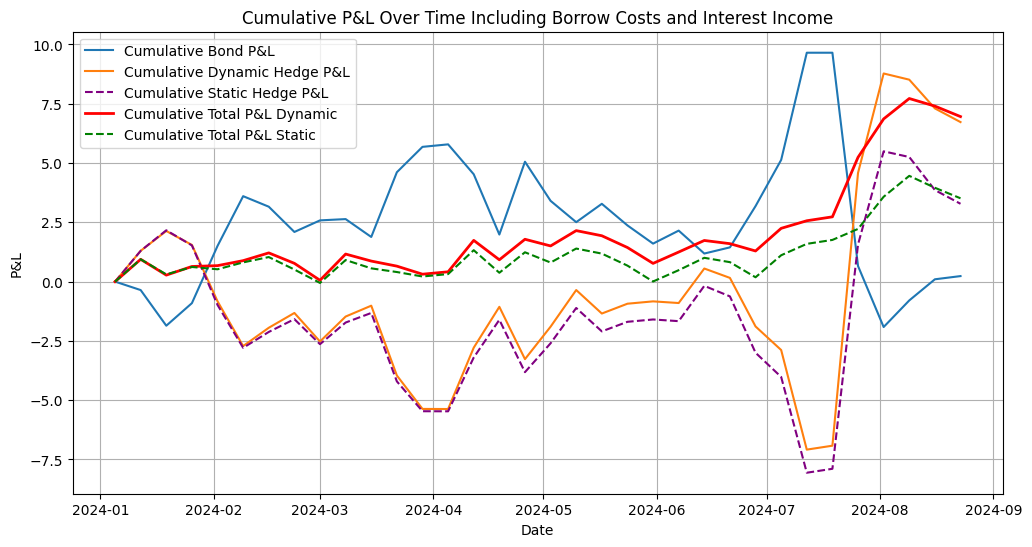

In [17]:
conv_prices = conv_prices.reset_index()

plt.figure(figsize=(12, 6))
plt.plot(conv_prices['Date'], conv_prices['cumulative_bond_pnl'], label='Cumulative Bond P&L')
plt.plot(conv_prices['Date'], conv_prices['cumulative_dynamic_hedge_pnl'], label='Cumulative Dynamic Hedge P&L')
plt.plot(conv_prices['Date'], conv_prices['cumulative_static_hedge_pnl'], label='Cumulative Static Hedge P&L', color='purple', linestyle='--')
plt.plot(conv_prices['Date'], conv_prices['cumulative_total_pnl_dynamic'], label='Cumulative Total P&L Dynamic', color='red', linewidth=2)
plt.plot(conv_prices['Date'], conv_prices['cumulative_total_pnl_static'], label='Cumulative Total P&L Static', color='green', linestyle='--')
plt.title('Cumulative P&L Over Time Including Borrow Costs and Interest Income')
plt.xlabel('Date')
plt.ylabel('P&L')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
rd.close_session()